# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/Documentos/Mestrado/ACOPResults/acopEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 12%|█▏        | 5/43 [00:00<00:00, 41.82it/s]

[104, 779, 214, 307, 262, 294, 1154, 1105, 770, 1126, 728, 1125, 924]
2 chs: 104 entries
3 chs: 779 entries
4 chs: 214 entries
5 chs: 307 entries
6 chs: 262 entries
7 chs: 294 entries
8 chs: 1154 entries
9 chs: 1105 entries
10 chs: 770 entries
15 chs: 1126 entries
20 chs: 728 entries
30 chs: 1125 entries
40 chs: 924 entries


 88%|████████▊ | 38/43 [00:07<00:01,  3.72it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 26%|██▌       | 11/43 [00:00<00:02, 12.50it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:05<00:00,  5.38it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:07<00:01,  4.58it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 26%|██▌       | 11/43 [00:00<00:02, 13.25it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:05<00:00,  6.04it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 74%|███████▍  | 32/43 [00:06<00:02,  3.76it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:06<00:00,  5.33it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 26%|██▌       | 11/43 [00:00<00:02, 12.37it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:05<00:01,  8.56it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  9.12it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:05<00:00,  7.26it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict)

{'BaggingRegressor': 10.401934792075354, 'RandomForestRegressor': 10.439618404843328, 'LinearRegression': 10.444348670411081, 'TransformedTargetRegressor': 10.444552904732458, 'DecisionTreeRegressor': 10.4504980482577}


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [13]:
import matplotlib.pyplot as plt

def plotGainBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Gain Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

def plotLossBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Loss Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(criterion = "mse", random_state=0)
model      = MultiOutputRegressor(BaggingRegressor(base_estimator = extra_tree, 
                                                   n_estimators   = 100,
                                                   random_state   = 0))

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - BaggingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [23.82373686  2.92234628 18.73668037  7.92186194 23.84548757  0.19247616]


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - RandomForestRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [23.83318252  2.89651537 18.68635879  7.86441805 23.84399187  0.18292055]


In [8]:
from sklearn.linear_model import LinearRegression

model = MultiOutputRegressor(LinearRegression())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - LinearRegression".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [23.828125  2.90625  18.703125  7.921875 23.84375   0.1875  ]


In [9]:
from sklearn.compose import TransformedTargetRegressor

model = MultiOutputRegressor(TransformedTargetRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - TransformedTargetRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [23.828125  2.90625  18.703125  7.921875 23.84375   0.1875  ]


In [10]:
from sklearn.tree import DecisionTreeRegressor

model = MultiOutputRegressor(DecisionTreeRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - DecisionTreeRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [23.828125  2.90625  18.703125  7.921875 23.84375   0.1875  ]


In [11]:
from sklearn.dummy import DummyRegressor

model = MultiOutputRegressor(DummyRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  9. 23.  3. 24.  1.] [22.09830867  4.71458774 19.8435518   5.71987315 23.43234672  0.17547569]


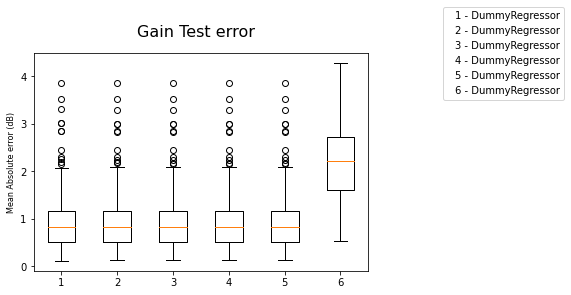

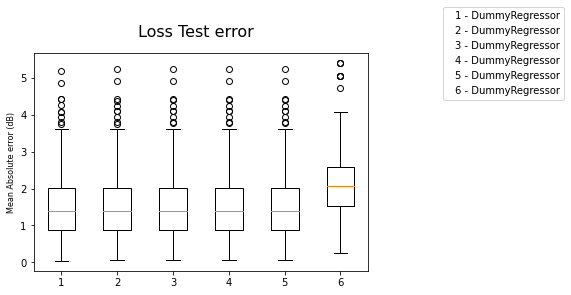

In [14]:
plotGainBoxPlots(errorArray[0])
plotLossBoxPlots(errorArray[1])